# Mini Project - Python
# Topic - Loan Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1. Import the dataset and understand it.

In [6]:
dataset_filename = (r"E:\Modules\1.MAY python\Py mini project\Project 1\loan.csv")
df_loan = pd.read_csv(dataset_filename)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


## 2. List down the number of rows and columns.

In [7]:
number_of_rows,number_of_columns = df_loan.shape
print("number_of_rows",number_of_rows)
print("number_of_columns",number_of_columns)


number_of_rows 39717
number_of_columns 23


## 3. ‘Int_rate’ column is character type. With the help of lambda function convert into float type. 

In [10]:
df_loan.int_rate = df_loan.int_rate.map(lambda x : float(x[:-1]))
print(df_loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade emp_length  ...  \
0       36 months     10.65       162.87     B  10+ years  ...   
1       60 months     15.27

In [12]:
column_data_types = df_loan.dtypes
print(column_data_types)

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object


## 4. Check the datatype of each column.

In [13]:
df_loan.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

## 5. Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways. 
    • axis: specifies whether to drop rows (axis=0) or columns (axis=1). 
    • how: specifies how to drop rows/columns.
        There are three options:
              any: drop the row if it contains any NaN values (default)
              all: drop the row if all values are NaN!

In [14]:
df_loan_cleaned = df_loan.dropna(axis=1,how='all')
df_loan_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


## 6. Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.

The isin() function is used to check each element in the DataFrame is contained in values or not

It returns a DataFrame similar to the original DataFrame, but the original values have been replaced with True if the value was one of the specified values, otherwise False.


In [15]:
loan_status_counts = df_loan['loan_status'].value_counts()
loan_status_counts[loan_status_counts.index.isin(['Fully Paid' , 'Charged Off'])]

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## 7. Filter the ‘Emp_Len’ column to extract the numerical value from the string. 
## Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

In [17]:
# Function to extract numerical value from 'Emp_Len' string
def extract_numerical_value(emp_length):
    if isinstance(emp_length, str):
        # Remove 'year' and any non-numeric characters
        numeric_value = ''.join(filter(str.isdigit, emp_length))
        return int(numeric_value)
    else:
        return emp_length

df_loan['emp_length'] = df_loan['emp_length'].apply(extract_numerical_value)
print(df_loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade  emp_length  ...  \
0       36 months     10.65       162.87     B        10.0  ...   
1       60 months     15.

## 8. Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [18]:
df_loan['term'] = df_loan['term'].apply(lambda x: int(str(x).split()[0]))
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10.0,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1.0,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10.0,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10.0,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1.0,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


## 9. Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria -  If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.

In [19]:
df_loan['risky_loan_applicant'] = df_loan.apply(lambda row : '0' if row['loan_amnt'] <= row['funded_amnt'] else '1', axis=1)
df_loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22,risky_loan_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10.0,...,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1.0,...,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10.0,...,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10.0,...,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1.0,...,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN,0


## 10. Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.

 loan_status & grade

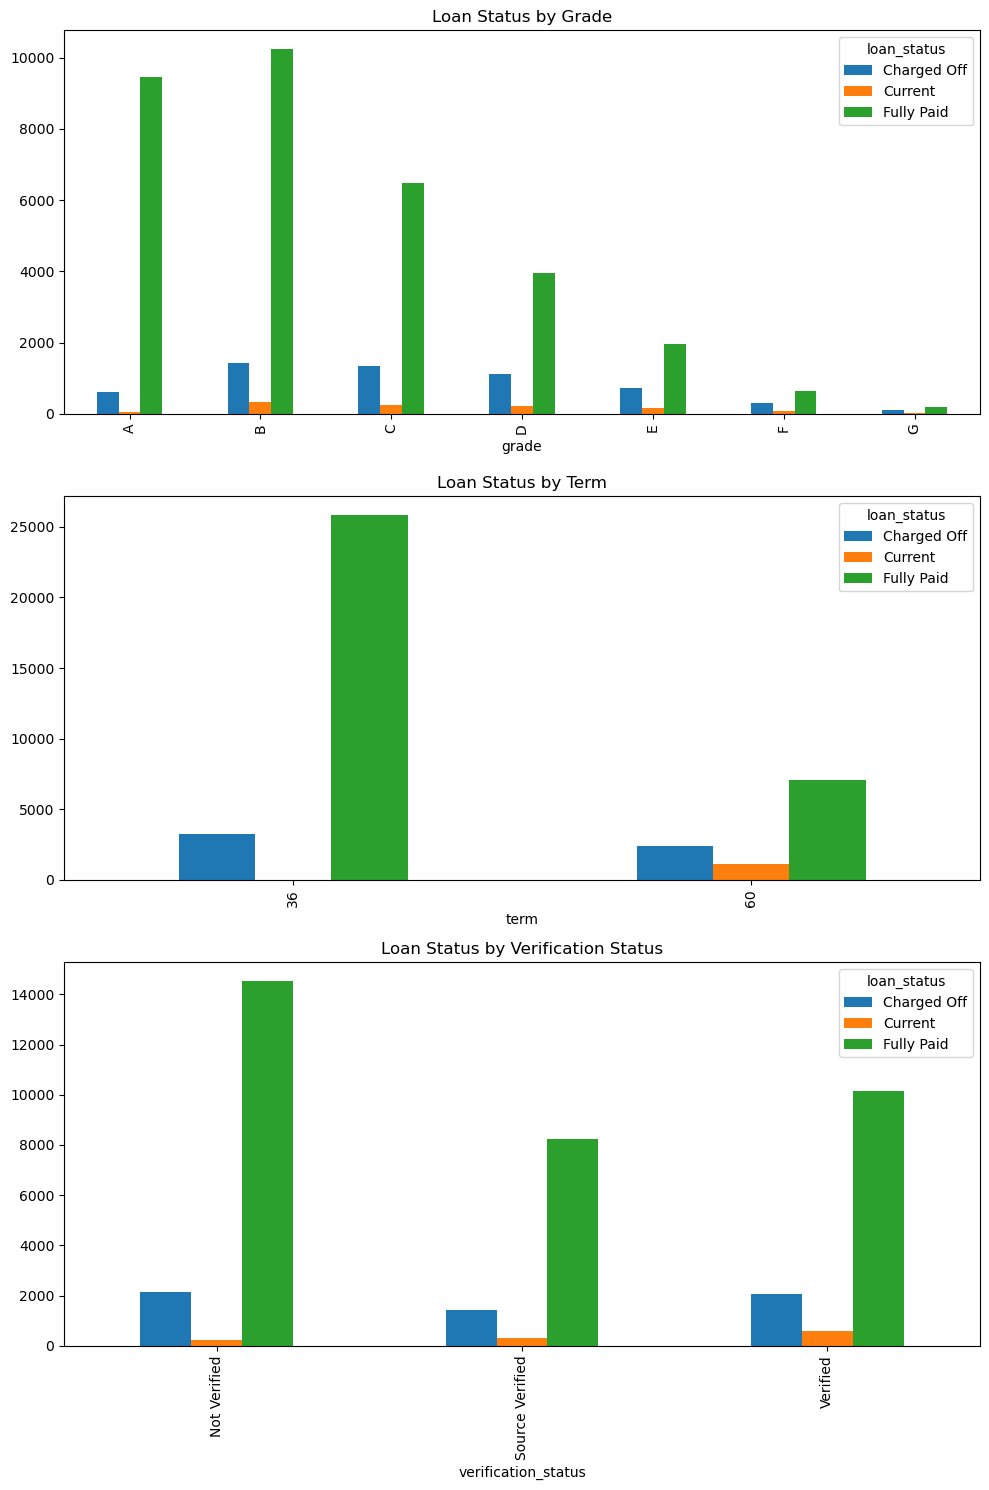

In [21]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot loan_status against grade
df_loan.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Loan Status by Grade')

# Plot loan_status against term
df_loan.groupby(['term', 'loan_status']).size().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Loan Status by Term')

# Plot loan_status against verification_status
df_loan.groupby(['verification_status', 'loan_status']).size().unstack().plot(kind='bar', ax=axes[2])
axes[2].set_title('Loan Status by Verification Status')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
1+2

## 11.Using a user defined function convert the ‘emp_len’ column into
## categorical column as follows -
## If emp_len is less than equals to 1 then recode as ‘fresher’.
## If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
## If emp_len is greater than 3 and less than 7 then recode as ‘senior’
## If emp_len is greater than 7 then recode as ‘expert’.

In [27]:
def recode_emp_length(emp_len):
    try:
        emp_len = int(emp_len.split()[0])  # Extract numeric part and convert to integer
        if emp_len <= 1:
            return 'fresher'
        elif emp_len < 3:
            return 'junior'
        elif emp_len < 7:
            return 'senior'
        else:
            return 'expert'
    except:
        return emp_len  # Return the original value if there's an error

# Apply the custom function to the 'emp_length' column
df_loan['emp_length'] = df_loan['emp_length'].apply(recode_emp_length)

print(df_loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0      1077501    1296599       5000         5000           4975.0    36   
1      1077430    1314167       2500         2500           2500.0    60   
2      1077175    1313524       2400         2400           2400.0    36   
3      1076863    1277178      10000        10000          10000.0    36   
4      1075358    1311748       3000         3000           3000.0    60   
...        ...        ...        ...          ...              ...   ...   
39712    92187      92174       2500         2500           1075.0    36   
39713    90665      90607       8500         8500            875.0    36   
39714    90395      90390       5000         5000           1325.0    36   
39715    90376      89243       5000         5000            650.0    36   
39716    87023      86999       7500         7500            800.0    36   

       int_rate  installment grade  emp_length  ...    dti   total_pymnt  \
0         1

## 12.Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot.

startangle - The startangle parameter is used when creating a pie chart in data visualization libraries like Matplotlib to specify the angle at which the first wedge of the pie should start. It allows you to rotate the entire pie chart, which can be useful for emphasizing a particular category or improving the visual appearance of the chart.

Text(0.5, 1.0, 'Distribution of Loan Amounts by Grade')

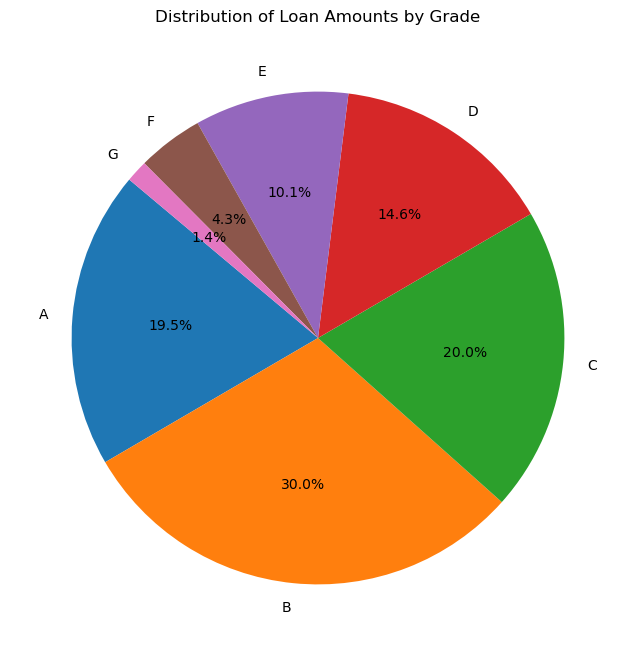

In [26]:
loan_amnt_by_grade = df_loan.groupby('grade')['loan_amnt'].sum()
plt.figure(figsize=(8,8))
plt.pie(loan_amnt_by_grade,labels=loan_amnt_by_grade.index,autopct="%1.1f%%",startangle=140)
plt.title('Distribution of Loan Amounts by Grade')
